In [1]:
from hciplot import plot_frames, plot_cubes
from matplotlib.pyplot import *
from matplotlib import pyplot as plt
import numpy as np

import vip_hci as vip

from vip_hci.metrics import completeness_curve, completeness_map
from vip_hci.config import VLT_NACO
from vip_hci.fm import cube_planet_free, normalize_psf
from vip_hci.metrics import inverse_stim_map, snr, snrmap, stim_map
from vip_hci.psfsub import median_sub, pca, pca_annular

# common to all versions:
from vip_hci.fits import open_fits, write_fits, info_fits
from vip_hci.metrics import contrast_curve, detection, significance, snr, snrmap, throughput
from vip_hci.preproc import frame_crop
from vip_hci.var import fit_2dgaussian, frame_center

In [2]:
psfnaco = 'VIP_extras/datasets/naco_betapic_psf.fits'
cubename = 'VIP_extras/datasets/naco_betapic_cube_cen.fits'
angname = 'VIP_extras/datasets/naco_betapic_pa.fits'

cube = open_fits(cubename)
psf = open_fits(psfnaco)
pa = open_fits(angname)

Fits HDU-0 data successfully loaded. Data shape: (61, 101, 101)
Fits HDU-0 data successfully loaded. Data shape: (39, 39)
Fits HDU-0 data successfully loaded. Data shape: (61,)


In [3]:
derot_off = 104.84 # NACO derotator offset for this observation (Absil et al. 2013)
TN = -0.45         # Position angle of true north for NACO at the epoch of observation (Absil et al. 2013)

angs = pa-derot_off-TN
pxscale_naco = VLT_NACO['plsc']

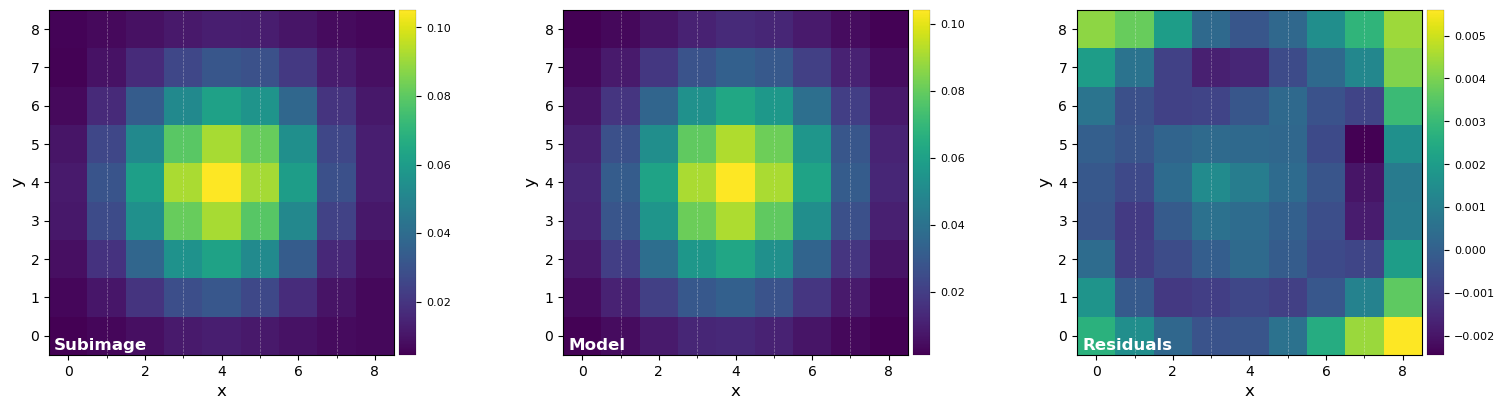

FWHM_y = 4.733218722257211
FWHM_x = 4.4736824050602895 

centroid y = 19.006680059041173
centroid x = 18.999424475165444
centroid y subim = 4.006680059041175
centroid x subim = 3.999424475165444 

amplitude = 0.10413004853269539
theta = -34.08563676834198
4.60345056365875
Flux in 1xFWHM aperture: 1.228


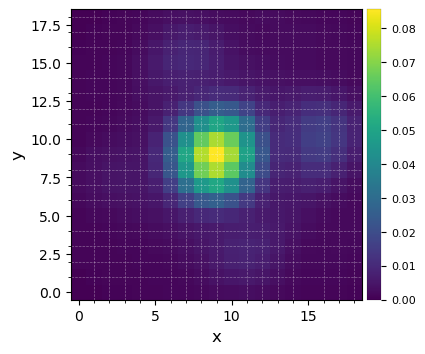

In [4]:
DF_fit = fit_2dgaussian(psf, crop=True, cropsize=9, debug=True, full_output=True)
fwhm_naco = np.mean([DF_fit['fwhm_x'],DF_fit['fwhm_y']])
print(fwhm_naco)
psfn = normalize_psf(psf, fwhm_naco, size=19, imlib='ndimage-fourier')
plot_frames(psfn, grid=True, size_factor=4)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
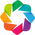

:Layout
   .Image.I :Image   [x,y]   (z)

In [5]:
pca_img = pca(cube, angs, ncomp=6, verbose=False, imlib='vip-fft', interpolation=None)
plot_frames(pca_img, backend='bokeh')

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-07-28 00:21:05
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:02.449697
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Blobs found: 3
 ycen   xcen
------ ------
46.130 	 43.396
35.555 	 58.654
57.920 	 47.674

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
X,Y = (43.4,46.1)
S/N constraint NOT fulfilled (S/N = 1.585)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
X,Y = (58.7,35.6)
S/N constraint NOT fulfilled (S/N = 2.696)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
X,Y = (47.7,57.9)
S/N constraint NOT fulfilled (S/N = 0.928)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


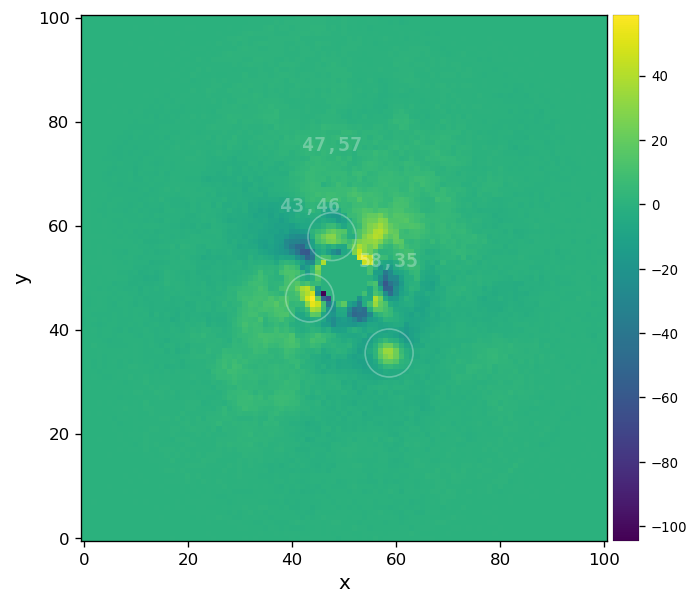

(array([], dtype=float64), array([], dtype=float64))

In [6]:
fr_adi = median_sub(cube, angs)
detection(fr_adi, fwhm=fwhm_naco, psf=psfn, debug=False, mode='log', snr_thresh=5,
          bkg_sigma=5, matched_filter=False)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-07-28 00:21:08
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
N annuli = 12, FWHM = 4.000
PCA per annulus (or annular sectors):
Ann 1    PA thresh: 11.42    Ann center:   2    N segments: 1 
Done PCA with lapack for current annulus
Running time:  0:00:00.063428
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Ann 2    PA thresh:  6.94    Ann center:   6    N segments: 1 
Done PCA with lapack for current annulus
Running time:  0:00:00.193305
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Ann 3    PA thresh:  6.04    Ann center:  10    N segments: 1 
Done PCA with lapack for current annulus
Running time:  0:00:00.328140
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Ann 4    PA thresh:  5.65    Ann center:  14    N segments: 1 
Done PCA with lapack for curr

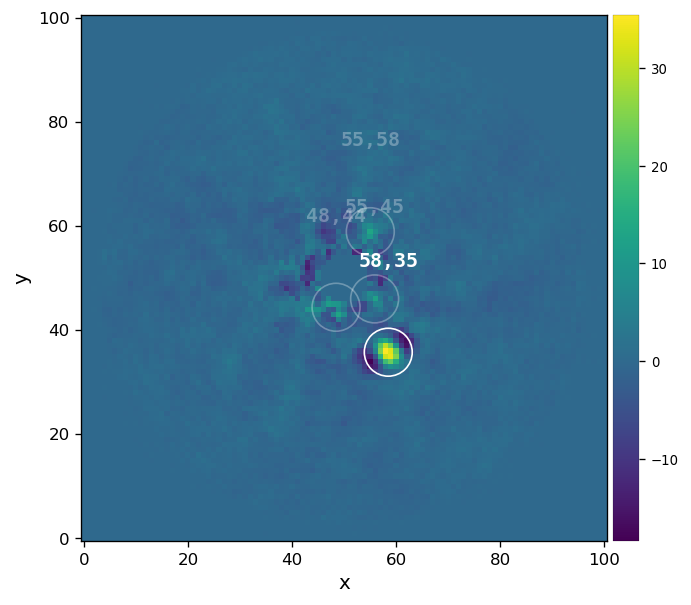

(array([35.70251926]), array([58.49134673]))

In [7]:
fr_pca = pca_annular(cube, angs, ncomp=7)
detection(fr_pca, fwhm=fwhm_naco, psf=psfn, bkg_sigma=5, debug=False, mode='log',
          snr_thresh=5, plot=True, verbose=True)

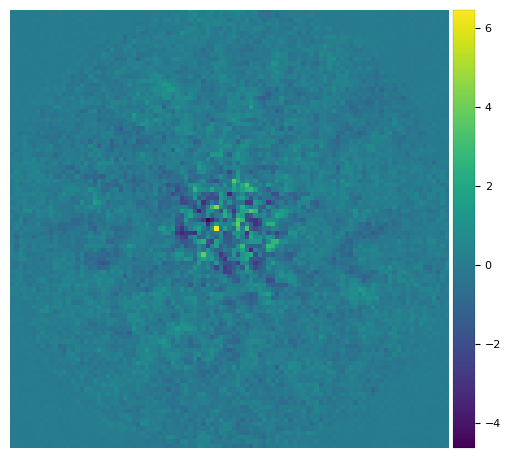

In [8]:
r_b =  0.452/pxscale_naco # Absil et al. (2013)
theta_b = 211.2+90 # Absil et al. (2013) - note the VIP convention is to measure angles from positive x axis
f_b = 648.2

cube_emp = cube_planet_free([(r_b, theta_b, f_b)], cube, angs, psfn=psfn)

pca_emp = pca(cube_emp, angs, ncomp=12, verbose=False)
plot_frames(pca_emp, axis=False)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-07-28 00:21:17
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Cube without fake companions processed with pca
Running time:  0:00:03.063133
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Measured annulus-wise noise in resulting frame
Running time:  0:00:03.077095
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Flux in 1xFWHM aperture: 1.000
Fake companions injected in branch 1 (pattern 1/3)
Running time:  0:00:03.141884
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Cube with fake companions processed with pca
Measuring its annulus-wise throughput
Running time:  0:00:06.226801
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Fake companions injected in branch 1 (pattern 2/3)
Running time:  0:00:06.281256
――――――――――――――――――

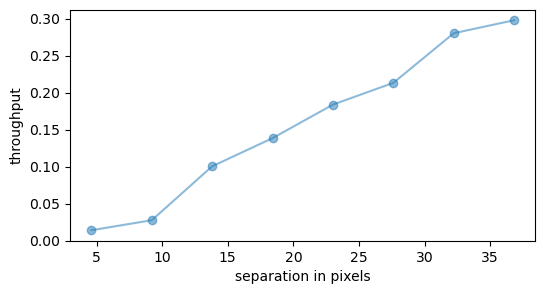

In [9]:
res_thr = throughput(cube_emp, angs, psfn, fwhm_naco, ncomp=15,
                     algo=pca, nbranch=1, full_output=True)
figure(figsize=(6,3))
plot(res_thr[3], res_thr[0][0,:], 'o-', alpha=0.5)
ylabel('throughput')
xlabel('separation in pixels')
plt.show()

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-07-28 01:50:14
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
System total memory = 33.257 GB
System available memory = 20.974 GB
Done vectorizing the frames. Matrix shape: (61, 10201)
Done SVD/PCA with numpy SVD (LAPACK)
Running time:  0:00:00.047340
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Done de-rotating and combining
Running time:  0:00:02.497062
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


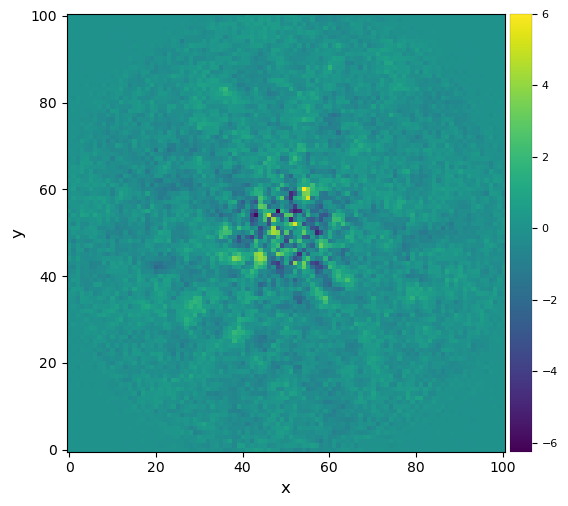

In [30]:
res = pca(cube_emp, angs, fwhm=fwhm_naco, ncomp=9)
plot_frames(res)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-07-28 01:47:30
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
ALGO : pca, FWHM = 4.60345056365875, # BRANCHES = 3, SIGMA = 5, STARPHOT = 764939.6
Finished the throughput calculation
Running time:  0:00:27.328041
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


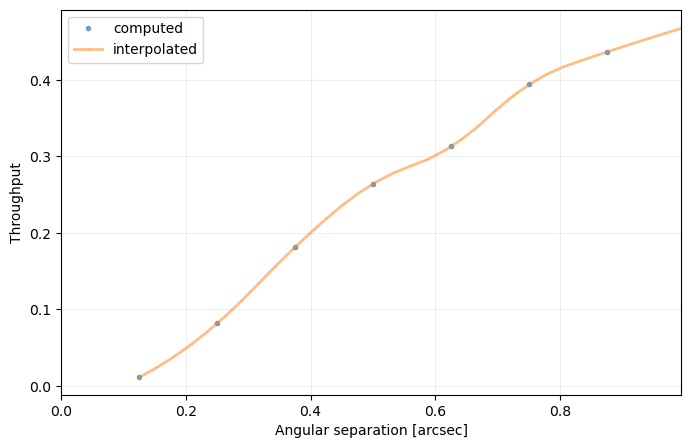

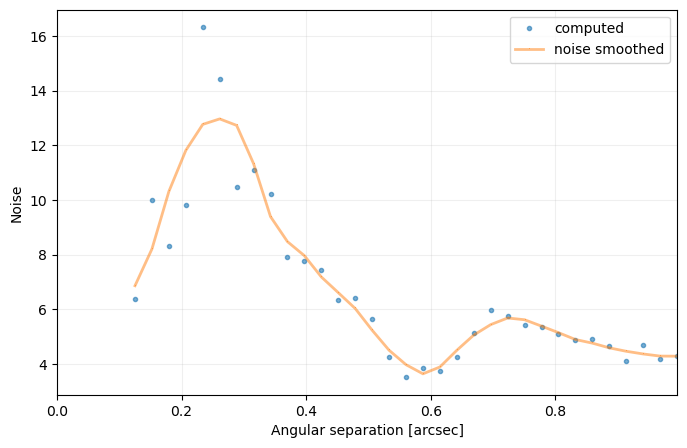

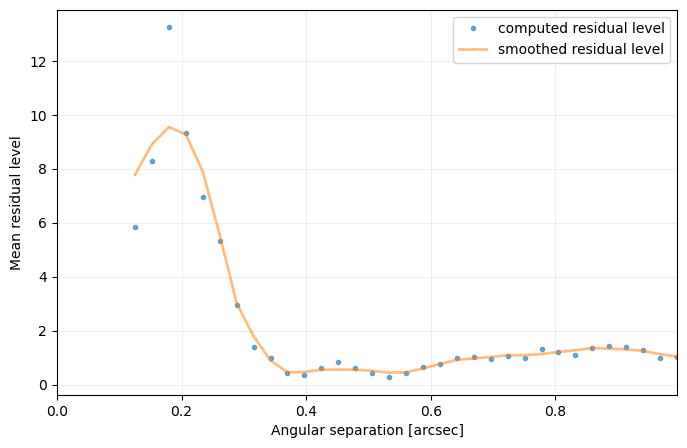

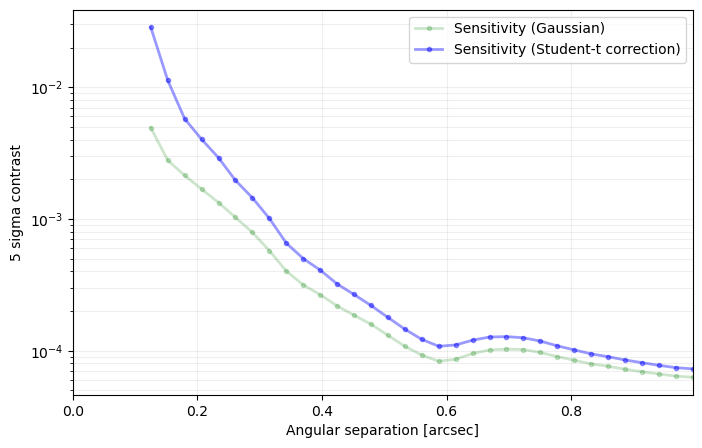

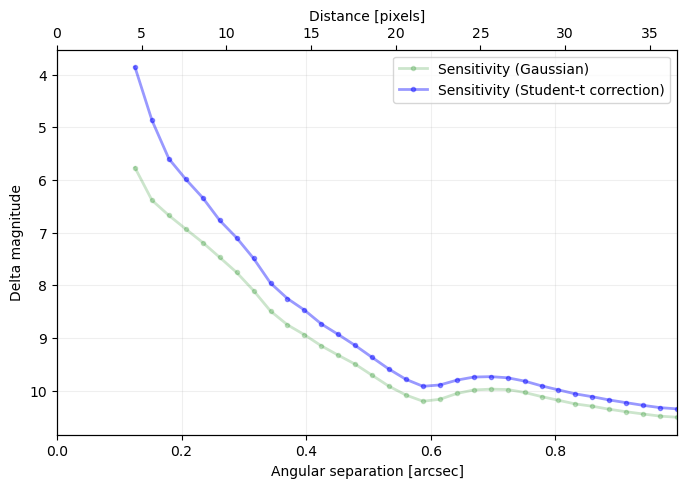

In [28]:
nsig=5
starphot = 764939.6
cc_1 = contrast_curve(cube_emp, angs, psfn, fwhm=fwhm_naco, pxscale=pxscale_naco, starphot=starphot,
                      sigma=nsig, nbranch=3, algo=pca, ncomp=9, debug=True)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-07-28 00:21:43
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
ALGO : pca_annular, FWHM = 4.60345056365875, # BRANCHES = 1, SIGMA = 5, STARPHOT = 764939.6
Finished the throughput calculation
Running time:  0:00:22.253884
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


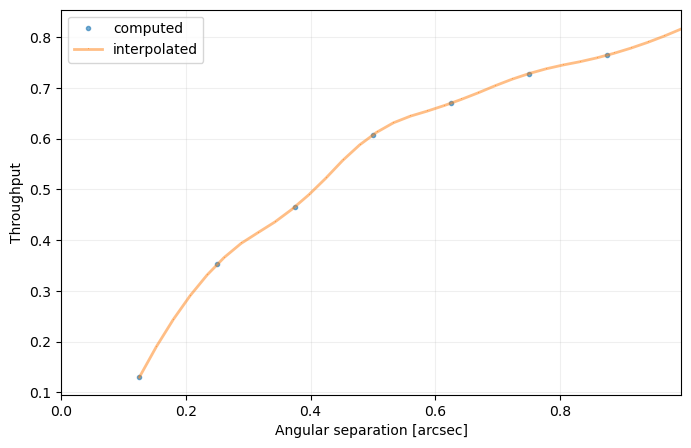

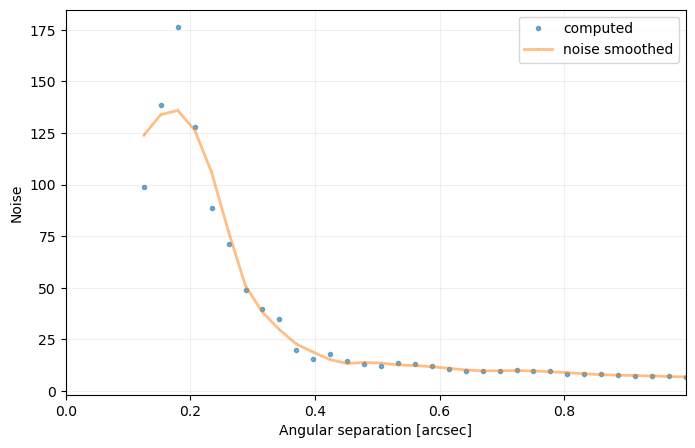

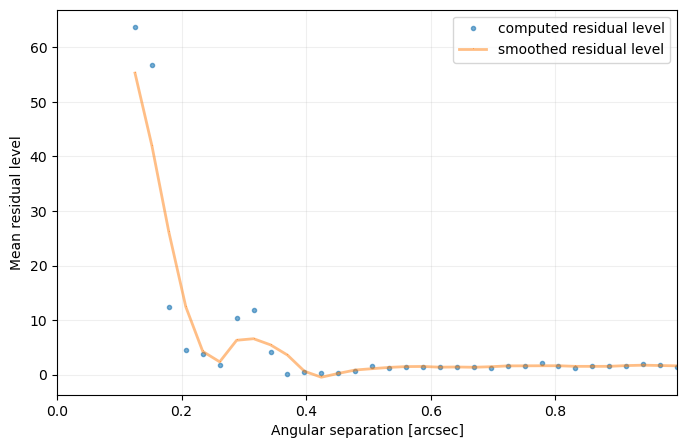

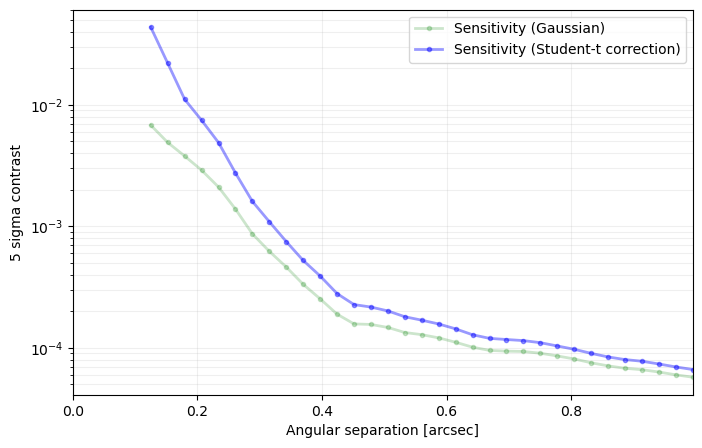

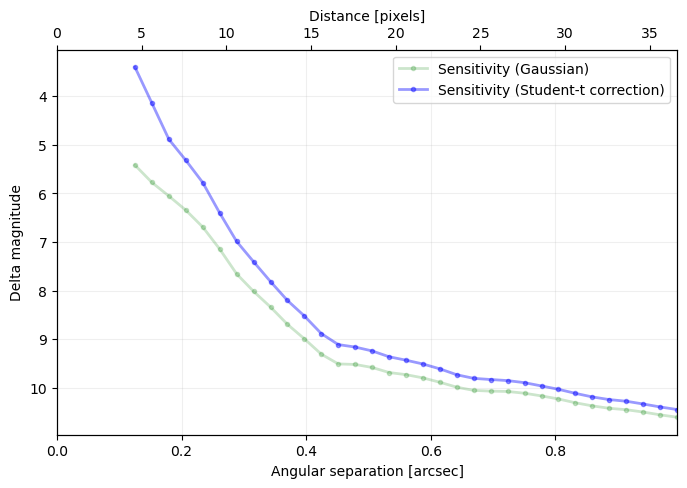

In [11]:
cc_2 = contrast_curve(cube_emp, angs, psfn, fwhm=fwhm_naco, pxscale=pxscale_naco, starphot=starphot,
                      sigma=nsig, nbranch=1, delta_rot=0.5, algo=pca_annular, ncomp=8,
                      radius_int=int(fwhm_naco), debug=True)

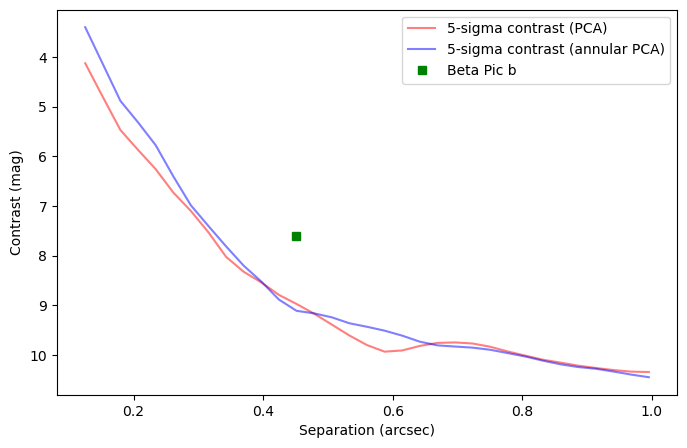

In [24]:
figure(figsize=(8,5))
plt.plot(np.array(cc_1['distance'])*pxscale_naco,
         -2.5*np.log10(np.array(cc_1['sensitivity_student'])),
         'r-', label='{}-sigma contrast (PCA)'.format(nsig), alpha=0.5)
plt.plot(np.array(cc_2['distance'])*pxscale_naco,
         -2.5*np.log10(np.array(cc_2['sensitivity_student'])),
         'b-', label='{}-sigma contrast (annular PCA)'.format(nsig), alpha=0.5)
r_b = 16.583
plt.plot(r_b*pxscale_naco,
         -2.5*np.log10(700./starphot), 'gs', label='Beta Pic b')
plt.gca().invert_yaxis()
ylabel('Contrast (mag)')
xlabel('Separation (arcsec)')
_ = legend(loc='best')
plt.show()

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-07-28 00:22:20
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
ALGO : pca_annular, FWHM = 4.60345056365875, # BRANCHES = 1, SIGMA = 5, STARPHOT = 764939.6
Finished the throughput calculation
Running time:  0:00:18.584126
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


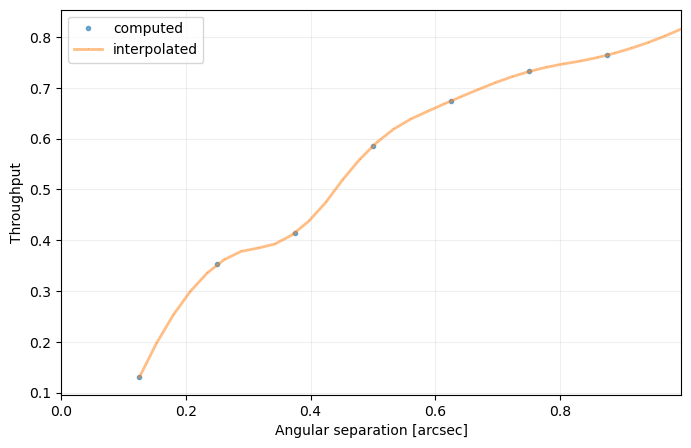

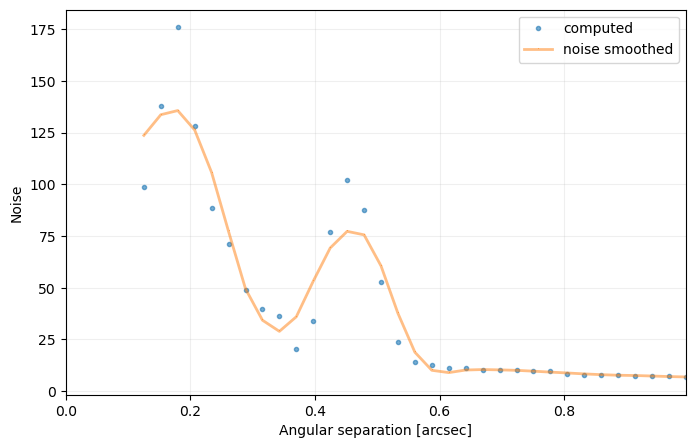

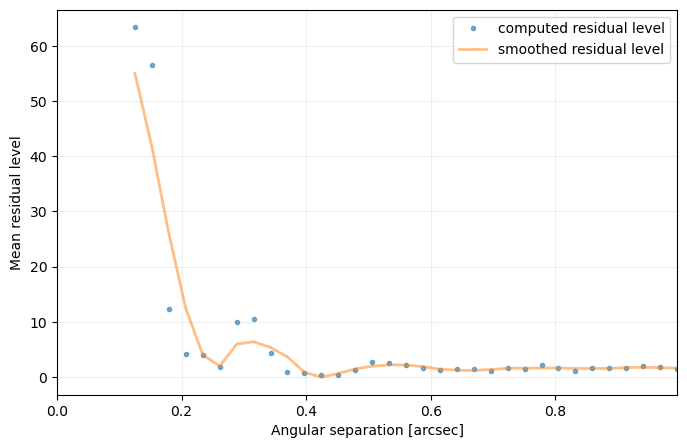

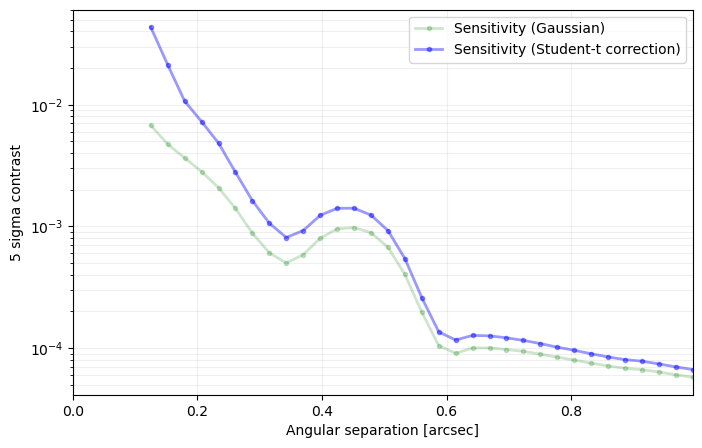

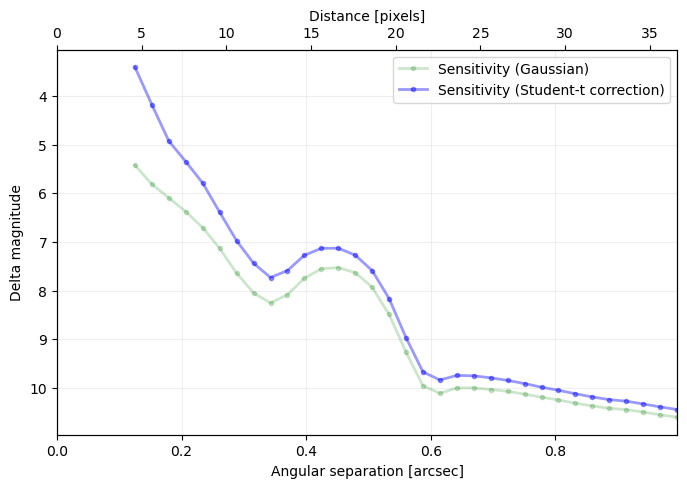

In [13]:
cc_not_emp = contrast_curve(cube, angs, psfn, fwhm=fwhm_naco, pxscale=pxscale_naco, starphot=starphot,
                            sigma=nsig, nbranch=1, delta_rot=0.5, algo=pca_annular, ncomp=8,
                            radius_int=int(fwhm_naco), debug=True)